In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_novo = pd.read_excel('../dados_finais_2024/final_data.xlsx')
df_antigo = pd.read_excel('../data/final_data_original.xlsx')

In [3]:
df_antigo = df_antigo.drop(columns=['Unnamed: 0'])

In [4]:
df_novo['Classe Vela'].value_counts()

ILCA 7                39646
ILCA 6                29721
49ER                  25989
49ERFX                16872
IQFOIL MASC.          13782
IQFOIL FEM.           10546
FORMULA KITE MASC.     7734
470                    5401
FORMULA KITE FEM.      4228
NACRA 17               3661
KITE                    276
IQFOIL 9                150
IQFOIL 8                140
Name: Classe Vela, dtype: int64

In [5]:
df_antigo['Classe Vela'] = df_antigo['Classe Vela'].map(lambda x: x.upper())

In [6]:
df_antigo['Classe Vela'] = df_antigo['Classe Vela'].replace('470.0','470')

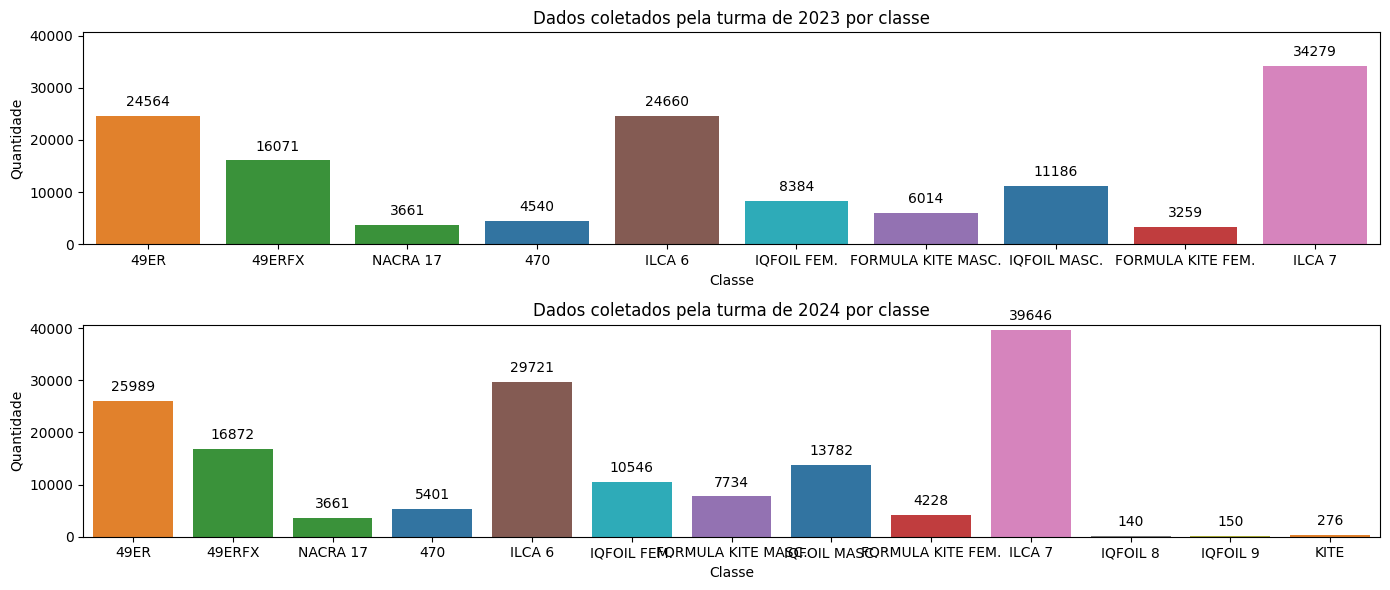

In [7]:
# plot quantidade de dados de cada df

fig, ax = plt.subplots(2, 1, figsize=(14, 6))

# Cria um dicionário de cores com base nas classes únicas de ambos os dataframes
classes_unicas = np.unique(np.concatenate((df_antigo['Classe Vela'].unique(), df_novo['Classe Vela'].unique())))
palette = dict(zip(classes_unicas, sns.color_palette(n_colors=len(classes_unicas))))

# Plota o primeiro gráfico de barras e adiciona os valores acima das barras
sns.countplot(data=df_antigo, x='Classe Vela', ax=ax[0], palette=palette)
ax[0].set_title('Dados coletados pela turma de 2023 por classe')
ax[0].set_xlabel('Classe')
ax[0].set_ylabel('Quantidade')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Plota o segundo gráfico de barras e adiciona os valores acima das barras
sns.countplot(data=df_novo, x='Classe Vela', ax=ax[1], palette=palette)
ax[1].set_title('Dados coletados pela turma de 2024 por classe')
ax[1].set_xlabel('Classe')
ax[1].set_ylabel('Quantidade')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Calcula o limite máximo de y com base nos dados de ambos os dataframes
ymax = max(df_antigo['Classe Vela'].value_counts().max(), df_novo['Classe Vela'].value_counts().max())

# Define o mesmo limite de y para ambos os subplots
ax[0].set_ylim([0, ymax+1000])
ax[1].set_ylim([0, ymax+1000])

plt.tight_layout()

plt.show()

<BarContainer object of 2 artists>

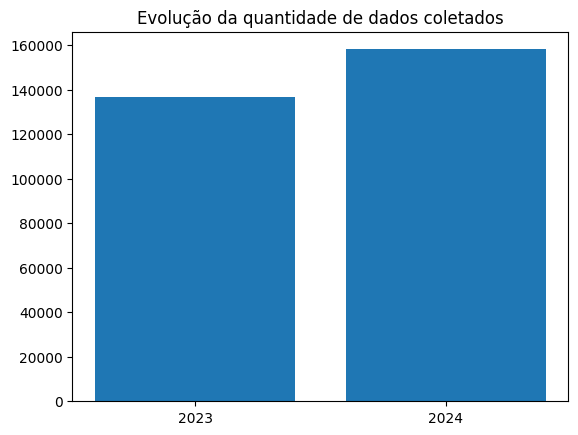

In [8]:
l1 = len(df_novo)
l0 = len(df_antigo)

# plot quantidade de dados de cada df

plt.title('Evolução da quantidade de dados coletados')
plt.bar(['2023', '2024'], [l0, l1])

,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,1,1,"WILLIAM JONES, EVAN DEPAUL",17.0,49ER,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017
1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7.0,49ER,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158141,158142,4419,Tobias NIGGL,NaN,ILCA 7,29,1,GERAL,28,DNF,158.0,129.0,Troféu Königswinkel ILCA 2023
158142,158143,4419,Tobias NIGGL,NaN,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158143,158144,4419,Tobias NIGGL,NaN,ILCA 7,25,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
158144,158145,4419,Tobias NIGGL,NaN,ILCA 7,26,0,GERAL,28,NaN,158.0,129.0,Troféu Königswinkel ILCA 2023
